In [0]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'memotion_analysis/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_dataframe = pd.read_csv('/content/train.csv')
del train_dataframe['OCR_extracted_text']
train_dataframe

,Image_name,Image_URL,corrected_text,Humour,Sarcasm,offensive,Motivational,Overall_Sentiment
0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,look friend lightyear sohalikut trend play 10 ...,0.000000,0.000000,0.000000,0.0,very_positive
1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,best 10 yearchallenge completed less 4 kudus ...,0.333333,0.000000,0.000000,1.0,very_positive
2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,sam thorne follow follow saw everyone postin...,0.666667,0.166667,0.000000,0.0,positive
3,10_year_10-year-challenge-sweet-dee-edition-40...,https://pics.conservativememes.com/10-year-cha...,10 year challenge sweet dee edition,0.666667,0.333333,0.333333,1.0,positive
4,10_year_10-year-challenge-with-no-filter-47-hi...,https://pics.me.me/10-year-challenge-with-no-f...,10 year challenge filter 47 hilarious 10 year ...,0.000000,0.500000,0.333333,0.0,neutral
...,...,...,...,...,...,...,...,...
7483,cat_U_367best-funny-cat-memes.jpg,https://cdn3-www.cattime.com/assets/uploads/ga...,,0.000000,0.000000,1.000000,1.0,positive
7484,cat_U_111curious_cat_happy_birthday_cat_meme1.jpg,https://www.wishesgreeting.com/wp-content/uplo...,,1.000000,0.000000,0.666667,1.0,very_positive
7485,cat_U_260meme27.png,https://catsareontop.com/wp-content/uploads/20...,,1.000000,0.000000,0.333333,0.0,positive
7486,cat_U_314Evil-Cat-Memes-Photos.png,https://www.catbreedselector.com/wp-content/up...,wow new sofa show mercy catbreed f catbreedse...,0.666667,0.333333,0.333333,0.0,positive


In [0]:
%cd 'gdrive'
%cd 'My Drive'
!mkdir memotion_analysis
%cd 'memotion_analysis'
!mkdir dataset
%cd 'dataset'
!mkdir train
%cd 'train'
!mkdir positive
!mkdir negative
!mkdir neutral

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/memotion_analysis
/content/gdrive/My Drive/memotion_analysis/dataset
/content/gdrive/My Drive/memotion_analysis/dataset/train


In [0]:
import urllib


opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent', 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)


**Data Extraction**
Images will be downloaded and saved in folders based in their overall sentiments.




In [0]:
# Download images and collect each label's data separately.
from os.path import join
import os


TRAIN_BASE_PATH = base_dir + 'dataset/train/'
negatives = ['negative', 'very_nagetive']
positives = ['positive', 'very_positive']
negative_memes, positive_memes, neutral_memes = [], [], []

for index, row in train_dataframe.iterrows():
  url = row['Image_URL']
  file_name = row['Image_name']
  filepath = TRAIN_BASE_PATH + 'negative/' if row['Overall_Sentiment'] in negatives \
      else TRAIN_BASE_PATH + 'positive/' if row['Overall_Sentiment'] in positives \
      else TRAIN_BASE_PATH + 'neutral/'
      
  filepath = join(filepath, file_name)
  if os.path.isfile(filepath):
    continue

  else:
    try:
      urllib.request.urlretrieve(url, filepath)

      if row['Overall_Sentiment'] in negatives:
        negative_memes += [{'text': row['corrected_text'], 'filepath': filepath, 'humour': row['Humour'],
                          'sarcasm': row['Sarcasm'], 'offensive': row['offensive'],
                          'motivational': row['Motivational']}]

      elif row['Overall_Sentiment'] in positives:
        positive_memes += [{'text': row['corrected_text'], 'filepath': filepath, 'humour': row['Humour'],
                          'sarcasm': row['Sarcasm'], 'offensive': row['offensive'],
                          'motivational': row['Motivational']}]
      else:
        neutral_memes += [{'text': row['corrected_text'], 'filepath': filepath, 'humour': row['Humour'],
                          'sarcasm': row['Sarcasm'], 'offensive': row['offensive'],
                          'motivational': row['Motivational']}]

    except Exception as e:
      print(e)

<urlopen error [Errno -5] No address associated with hostname>
HTTP Error 522: Origin Connection Time-out
<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -5] No address associated with hostname>
<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -5] No address associated with hostname>
HTTP Error 522: Origin Connection Time-out
URL can't contain control characters. '/teepublic/image/private/s--2w_Lv3Ck--/t_Preview/b_rgb:ffffff,BE AWESOME ,BE AWESOME ,funny,general,not_offensive,not_motivational,very_positive\nbarney_828175a7b5e839a944f76ee7f44d43a6.jpg,https://i.pinimg.com/originals/82/81/75/828175a7b5e839a944f76ee7f44d43a6.jpg,AWESOME How my friends see me How my family How society sees sees me me How my camera sees me How I see me How I really am ,AWESOME How my friends see me How my family How society sees sees me me How my camera sees me How I see 

In [0]:
negetives_dataframe = pd.DataFrame(negative_memes)
positive_dataframe = pd.DataFrame(positive_memes)
neutral_dataframe = pd.DataFrame(neutral_memes)

In [0]:
negetives_dataframe.to_csv('negatives_1.csv')
positive_dataframe.to_csv('positives_1.csv')
neutral_dataframe.to_csv('neutral_1.csv')

[Errno 2] No such file or directory: 'memotion_analysis'
/content/gdrive


In [0]:
%cd 'gdrive'
%cd 'My Drive'
%cd 'memotion_analysis'
%cd 'dataset'
%cd 'train'
%cd 'positive'
print('number of positive memes:')
!ls -1 | wc -l

%cd '..'
%cd 'negative'
print('number of negative memes:')
!ls -1 | wc -l

%cd '..'
%cd 'neutral'
print('number of neutral memes:')
!ls -1 | wc -l



[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/My Drive
[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive
/content/gdrive/My Drive/memotion_analysis
/content/gdrive/My Drive/memotion_analysis/dataset
/content/gdrive/My Drive/memotion_analysis/dataset/train
/content/gdrive/My Drive/memotion_analysis/dataset/train/positive
number of positive memes:
3687
/content/gdrive/My Drive/memotion_analysis/dataset/train
/content/gdrive/My Drive/memotion_analysis/dataset/train/negative
number of negative memes:
414
/content/gdrive/My Drive/memotion_analysis/dataset/train
/content/gdrive/My Drive/memotion_analysis/dataset/train/neutral
number of neutral memes:
2105


1282 images could not be downloaded. Totally 6206 positive, negative and neutral memes are downloaded and saved into seperate csv files.

**Train and validation datasets**
We now create the train and validation datasets required for learning.

In [0]:
# Create one unit csv file from all downloaded images
negatives_dataframe = pd.read_csv('/content/gdrive/My Drive/memotion_analysis/dataset/negatives_1.csv')
positive_dataframe = pd.read_csv('/content/gdrive/My Drive/memotion_analysis/dataset/positives_1.csv')
neutral_dataframe = pd.read_csv('/content/gdrive/My Drive/memotion_analysis/dataset/neutral_1.csv')

negatives_dataframe['Overall_Sentiment'] = 0
neutral_dataframe['Overall_Sentiment'] = 1
positive_dataframe['Overall_Sentiment'] = 2

memes_dataframe = pd.concat([negatives_dataframe, neutral_dataframe, positive_dataframe], axis=0, ignore_index=True)
memes_dataframe = memes_dataframe.sample(frac=1).reset_index(drop=True)
memes_dataframe = memes_dataframe.loc[:, ~memes_dataframe.columns.str.contains('^Unnamed')]
memes_dataframe

,text,filepath,humour,sarcasm,offensive,motivational,Overall_Sentiment
0,technology,/content/gdrive/My Drive/memotion_analysis/dat...,0.333333,0.166667,0.000000,0.0,1
1,tide goes tide goes aliens h hd,/content/gdrive/My Drive/memotion_analysis/dat...,1.000000,0.000000,0.000000,0.0,2
2,got meme,/content/gdrive/My Drive/memotion_analysis/dat...,0.333333,0.000000,0.666667,0.0,1
3,new xmen movie looks dope gonna villain,/content/gdrive/My Drive/memotion_analysis/dat...,1.000000,0.000000,0.000000,0.0,1
4,someone richard better chandler,/content/gdrive/My Drive/memotion_analysis/dat...,1.000000,0.166667,0.000000,0.0,1
...,...,...,...,...,...,...,...
5966,city team let celebrate destroying city,/content/gdrive/My Drive/memotion_analysis/dat...,1.000000,0.333333,0.333333,1.0,2
5967,happy birthday arranged party pay bills also j...,/content/gdrive/My Drive/memotion_analysis/dat...,1.000000,0.000000,0.666667,0.0,2
5968,mark zuckerberg swearing oath senate committee...,/content/gdrive/My Drive/memotion_analysis/dat...,0.000000,0.166667,0.000000,0.0,1
5969,least work group project teacher gives credit...,/content/gdrive/My Drive/memotion_analysis/dat...,0.666667,0.000000,0.333333,0.0,2


In [0]:
memes_dataframe.to_csv('/content/gdrive/My Drive/memotion_analysis/dataset/train.csv')

**Loading images**
Now we save images and other of features required for network learning into lists.

In [0]:
train_dataframe = pd.read_csv('/content/gdrive/My Drive/memotion_analysis/dataset/train.csv')
train_dataframe = train_dataframe.loc[:, ~train_dataframe.columns.str.contains('^Unnamed')]
train_dataframe = train_dataframe.dropna(subset=['text'])

In [0]:
# Split train and validation dataframes
train_test_factor = 0.85
mask = np.random.rand(len(train_dataframe)) < train_test_factor
validation_dataframe = train_dataframe[~mask]
train_dataframe = train_dataframe[mask]

In [6]:
# Shuffle train dataframe
train_dataframe = train_dataframe.sample(frac=1).reset_index(drop=True)
train_dataframe['Overall_Sentiment'].value_counts()

2    3000
1    1715
0     339
Name: Overall_Sentiment, dtype: int64

In [7]:
# Shuffle validation dataframe
validation_dataframe = validation_dataframe.sample(frac=1).reset_index(drop=True)
validation_dataframe['Overall_Sentiment'].value_counts()

2    542
1    312
0     60
Name: Overall_Sentiment, dtype: int64

**Loading images**
Now we save images and other of features required for network learning into lists.

In [8]:
from keras.preprocessing import image as keras_image


def preprocess_image(image):
  img = image.copy()
  img = keras_image.img_to_array(img)
  img = img//255.0

  return img

Using TensorFlow backend.


In [0]:
train_list = train_dataframe.to_dict('records')
validation_list = validation_dataframe.to_dict('records')

In [10]:
# Create train and validation dataset 
xs_images = {'train': [], 'validation': []}
xs_categoricals = {'train': [], 'validation': []}
xs_texts = {'train': [], 'validation': []}
ys = {'train': [], 'validation': []}

for image_data in train_list:
  try:
    image = keras_image.load_img(image_data['filepath'], target_size=(128, 128))
  except Exception as e:
    print(e)
    continue

  image = preprocess_image(image)
  xs_images['train'].append(image)
  xs_texts['train'].append(image_data['text'])
  humour = image_data['humour']
  sarcasm = image_data['sarcasm']
  offensive = image_data['offensive']
  motivational = image_data['motivational']
  xs_categoricals['train'].append([humour, sarcasm, offensive, motivational])
  ys['train'] += [image_data['Overall_Sentiment']]

for image_data in validation_list:
  try:
    image = keras_image.load_img(image_data['filepath'], target_size=(128, 128))
  except Exception as e:
    print(e)
    continue
    
  image = preprocess_image(image)
  xs_images['validation'].append(image)
  xs_texts['validation'].append(image_data['text'])
  humour = image_data['humour']
  sarcasm = image_data['sarcasm']
  offensive = image_data['offensive']
  motivational = image_data['motivational']
  xs_categoricals['validation'].append([humour, sarcasm, offensive, motivational])
  ys['validation'] += [image_data['Overall_Sentiment']]


cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/jim_got-to-love-jim-carrey_gp_2415921.jpg'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/gene_59157598.jpg'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/negative/third_Skeptical-Third-World-Kid-meme-collection-1mut.com-16.jpg'


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/harvey_14.jpg'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/neutral/spiderman_60s-spiderman-meme-collection-1mut.com-8.png'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/best_2017_meme-costumes-2017-great-funny-halloween-costumes-2017-memes-of-meme-costumes-2017.jpg'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/bean_mr-bean-face-imgflip.jpg'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/chuck_Hilarious-Chuck-Norris-Memes-Ever-2-1024x671.png'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/minion_66c264447c732f73e6c50f92dcaad539-635x802.jpg'
cannot identify image file '/content/gdrive/My Drive/memotion_analysis/dataset/train/positive/gene_85YOUR-ARGUMENT-IS-INVALID-me

In [0]:
# Sanity check
assert (len(ys['train']) == len(xs_images['train']) == len(xs_texts['train']) == len(xs_categoricals['train'])),"There is some problem."
assert (len(ys['validation']) == len(xs_images['validation']) == len(xs_texts['validation']) == len(xs_categoricals['validation'])),"There is some problem."

**Word2Vec Embedding** Now its time to embed texts using pre-trainded embedding model Word2Vec.

In [12]:
# Find texts maximum length for padding
MAX_SEQUENCE_LENGTH = 0
for image_data in train_list:
  MAX_SEQUENCE_LENGTH = max(MAX_SEQUENCE_LENGTH, len(image_data['text'].split(' ')))

for image_data in validation_list:
  MAX_SEQUENCE_LENGTH = max(MAX_SEQUENCE_LENGTH, len(image_data['text'].split(' ')))

print(MAX_SEQUENCE_LENGTH)

104


In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip
!cp -a 'glove.6B.100d.txt' 'gdrive/My Drive/memotion_analysis/word2vec/'

--2020-01-23 14:18:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-23 14:18:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-23 14:18:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
all_texts = xs_texts['train'] + xs_texts['validation']

In [14]:
# Tokenize input texts
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


MAX_NB_WORDS = 10000

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(all_texts)
train_sequences = tokenizer.texts_to_sequences(xs_texts['train'])
validation_sequences = tokenizer.texts_to_sequences(xs_texts['validation'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

xs_texts['train'] = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ys['train'] = to_categorical(np.asarray(ys['train']))
print('Shape of train data tensor:', xs_texts['train'].shape)
print('Shape of train label tensor:', ys['train'].shape)

xs_texts['validation'] = pad_sequences(validation_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ys['validation'] = to_categorical(np.asarray(ys['validation']))
print('Shape of validation train data tensor:', xs_texts['validation'].shape)
print('Shape of validation train label tensor:', ys['validation'].shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 10844 unique tokens.
Shape of train data tensor: (5039, 104)
Shape of train label tensor: (5039, 3)
Shape of validation train data tensor: (913, 104)
Shape of validation train label tensor: (913, 3)


In [15]:
import os


embeddings_index = {}

f = open('gdrive/My Drive/memotion_analysis/word2vec/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
EMBEDDING_DIM = 100
     

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector



**Building up the model** Now we create our baseline network using keras functional APIs and pre-trained CNN using VGG16 model.

In [0]:
from keras.layers import Input, Embedding, LSTM, Dense, Conv2D, MaxPool2D, Flatten, Dropout, concatenate
from keras.models import Model
from keras import regularizers


embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
lstm = LSTM(300, return_sequences=True)(embedded_sequences)
lstm = LSTM(300)(lstm)

categorical_input = Input(shape=(4,))
x = Dense(64, activation='relu')(categorical_input)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

image_input = Input(shape=(128, 128, 3))
y = Conv2D(50,(5,5),activation='relu')(image_input)
y = MaxPool2D()(y)
y = Conv2D(25,(5,5),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(25,(4,4),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(5,(3,3),activation='relu')(y)
y = Flatten()(y)

merged = concatenate([lstm, x, y], axis=1)
x = Dense(128, activation='relu')(merged)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=[sequence_input, categorical_input, image_input], outputs=[output])

In [0]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 124, 124, 50) 3800        input_21[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_19 (MaxPooling2D) (None, 62, 62, 50)   0           conv2d_25[0][0]                  
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 58, 58, 25)   31275       max_pooling2d_19[0][0]           
____________________________________________________________________________________________

In [0]:
# Convert train and test dataset to numpy arrays
train_x = [np.asarray(xs_texts['train']), np.asarray(xs_categoricals['train']), np.asarray(xs_images['train'])]
validation_data = ([np.asarray(xs_texts['validation']), np.asarray(xs_categoricals['validation']), np.asarray(xs_images['validation'])], ys['validation'])

In [0]:
from keras import optimizers


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_x, ys['train'], validation_data=validation_data, epochs=20, batch_size=64)

Train on 4774 samples, validate on 1178 samples
Epoch 1/20
4774/4774 [==============================] - 32s 7ms/step - loss: 0.8682 - acc: 0.5884 - val_loss: 0.8667 - val_acc: 0.6087
Epoch 2/20
4774/4774 [==============================] - 24s 5ms/step - loss: 0.8410 - acc: 0.5915 - val_loss: 0.8540 - val_acc: 0.5976
Epoch 3/20
4774/4774 [==============================] - 24s 5ms/step - loss: 0.8236 - acc: 0.6016 - val_loss: 0.8719 - val_acc: 0.5849
Epoch 4/20
4774/4774 [==============================] - 24s 5ms/step - loss: 0.8110 - acc: 0.6037 - val_loss: 0.8625 - val_acc: 0.5739
Epoch 5/20
4774/4774 [==============================] - 23s 5ms/step - loss: 0.7901 - acc: 0.6217 - val_loss: 0.8596 - val_acc: 0.6197
Epoch 6/20
4774/4774 [==============================] - 24s 5ms/step - loss: 0.8019 - acc: 0.6116 - val_loss: 0.8466 - val_acc: 0.6095
Epoch 7/20
4774/4774 [==============================] - 24s 5ms/step - loss: 0.7986 - acc: 0.6255 - val_loss: 0.8644 - val_acc: 0.5993
Epoch 8

**To improve network performance** Number of negative class images are not high enough compared to other labels. So we assign weights in order to balance data training. We also change learning rate after certain epochs and we use regulizers to avoid overfitting.


In [0]:
from keras.layers import Input, Embedding, LSTM, Dense, Conv2D, MaxPool2D, Flatten, Dropout, concatenate
from keras.models import Model
from keras import regularizers


embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
lstm = LSTM(300, return_sequences=True)(embedded_sequences)
lstm = LSTM(300, return_sequences=True)(lstm)
lstm = LSTM(300, kernel_regularizer=regularizers.l2(0.01))(lstm)

categorical_input = Input(shape=(4,))
x = Dense(64, activation='relu')(categorical_input)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)

image_input = Input(shape=(128, 128, 3))
y = Conv2D(64,(5,5),activation='relu')(image_input)
y = MaxPool2D()(y)
y = Conv2D(32,(5,5),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(32,(4,4),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(4,(3,3),activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
y = Flatten()(y)

merged = concatenate([lstm, x, y], axis=1)
x = Dropout(0.3)(merged)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=[sequence_input, categorical_input, image_input], outputs=[output])

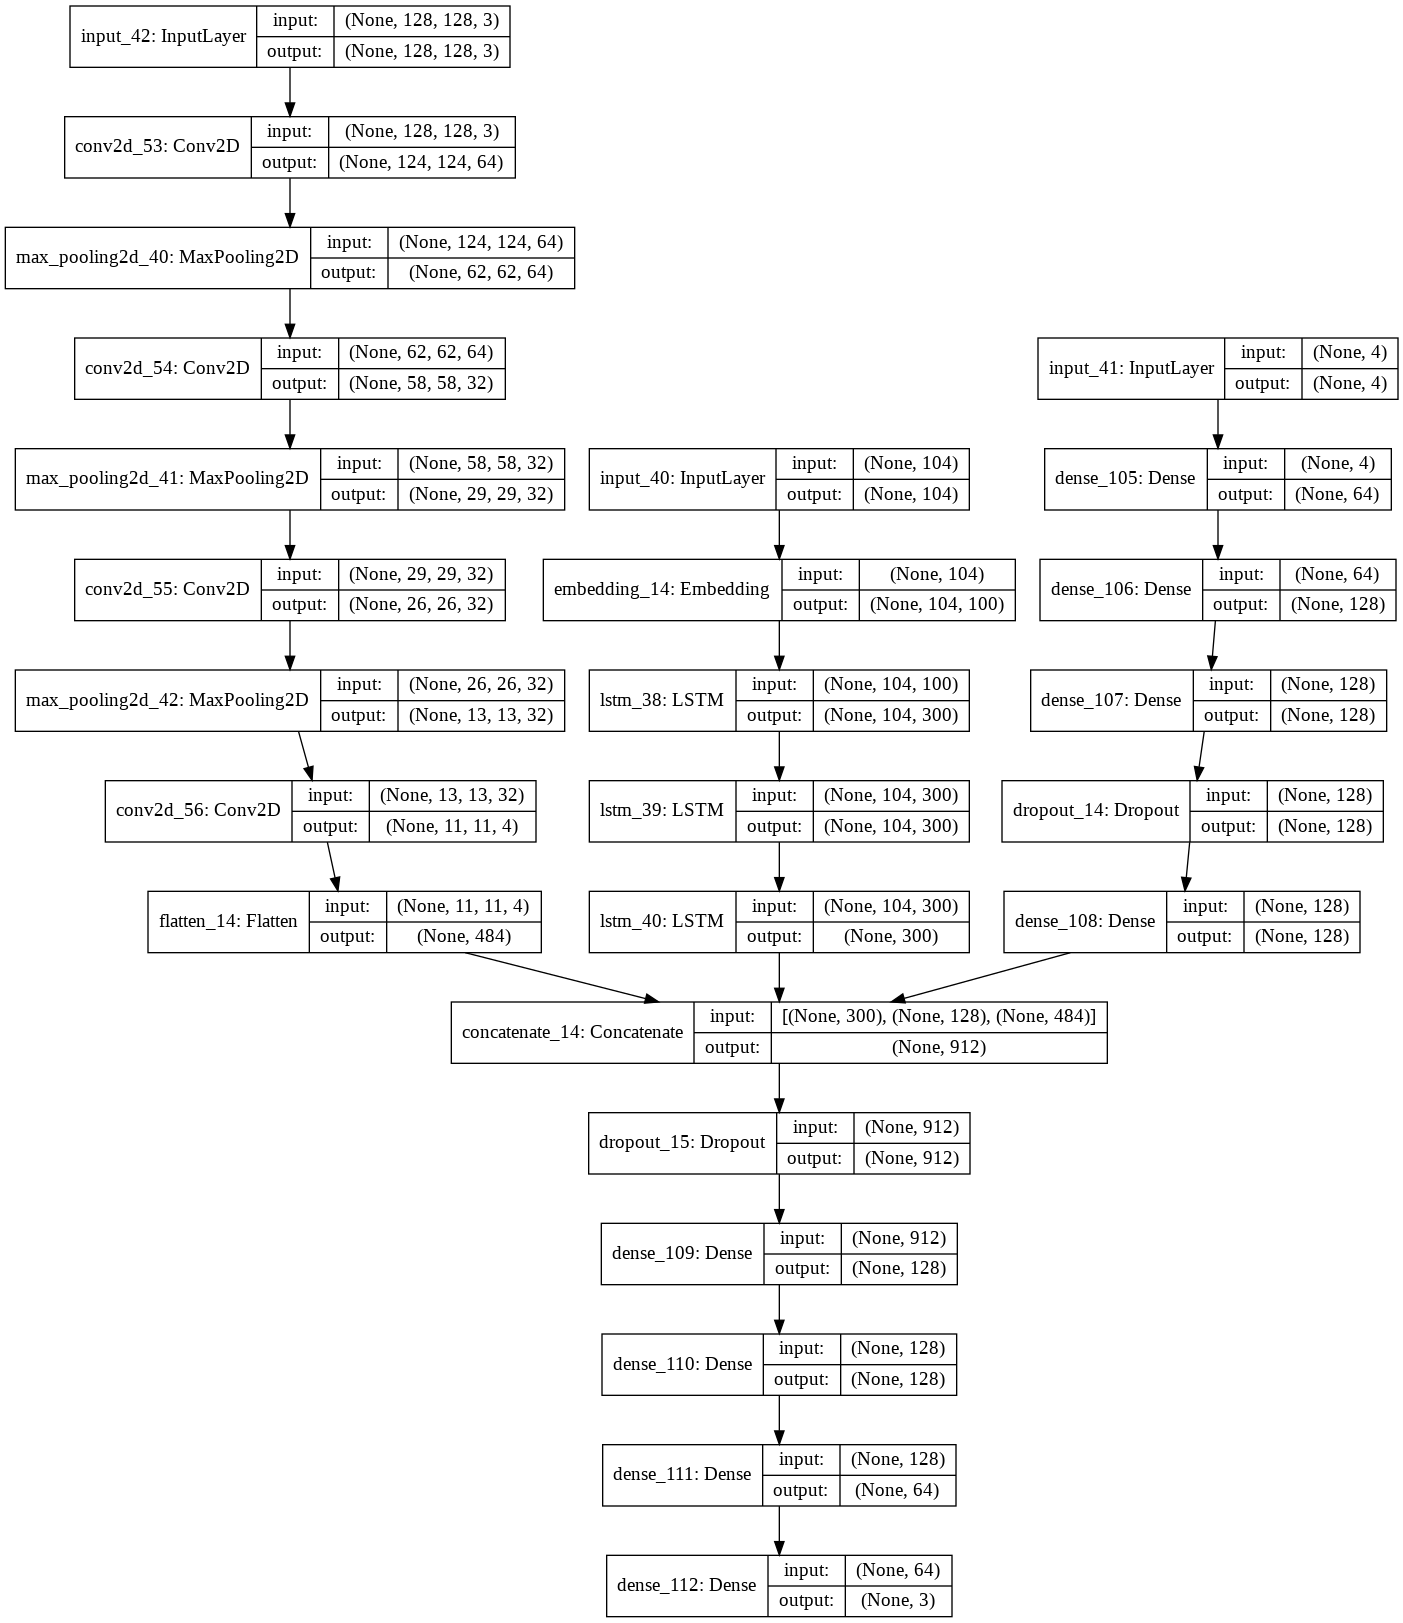

In [0]:
from keras.utils import plot_model


plot_model(model, to_file='model.png', show_shapes=True)

In [0]:
# Create learning rate scheduler method in order to change lr during training session.
from keras.callbacks import LearningRateScheduler


def lr_scheduler(epoch, lr):
    if epoch % 30 == 0 and epoch != 0:
        lr = lr/10
        return lr
    return lr

In [19]:
# Compute class weights in order to handle unbalanced data
from sklearn.utils.class_weight import compute_class_weight


y_integers = np.argmax(ys['train'], axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 4.9694280078895465, 1: 0.9805409612765129, 2: 0.5621374386434628}

In [0]:
from keras import optimizers


callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, ys['train'], validation_data=validation_data, epochs=100, batch_size=64, class_weight=d_class_weights, callbacks=callbacks)

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [21]:
from keras.layers import Input, Embedding, LSTM, Dense, Conv2D, MaxPool2D, Flatten, Dropout, concatenate
from keras.models import Model
from keras import regularizers


embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
lstm = LSTM(300, return_sequences=True)(embedded_sequences)
lstm = LSTM(300, return_sequences=True)(lstm)
lstm = LSTM(300, kernel_regularizer=regularizers.l2(0.01))(lstm)

categorical_input = Input(shape=(4,))
x = Dense(64, activation='relu')(categorical_input)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)

image_input = Input(shape=(128, 128, 3))
y = Conv2D(64,(5,5),activation='relu')(image_input)
y = MaxPool2D()(y)
y = Conv2D(32,(5,5),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(32,(4,4),activation='relu')(y)
y = MaxPool2D()(y)
y = Conv2D(4,(3,3),activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
y = Flatten()(y)

merged = concatenate([lstm, x, y], axis=1)
x = Dropout(0.3)(merged)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=[sequence_input, categorical_input, image_input], outputs=[output])











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
from keras import optimizers


callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]
model.compile(optimizer="adam",
              loss='mse',
              metrics=['accuracy'])
history = model.fit(train_x, ys['train'], validation_data=validation_data, epochs=100, batch_size=64, class_weight=d_class_weights, callbacks=callbacks)

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
